# IMPORTING LIBRARIES

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# MERGING _2010_2020 DATASET WITH _1991_2025_minus2010_to_2020 DATASET

In [41]:
Project_1_2m_temp_2010_2020 = xr.open_dataset('Project_1_2m_temp_2010_2020.nc')
Project_1_2m_temp_1991_2025_minus2010_to_2020 = xr.open_dataset('Project_1_2m_temp_1991_2025_minus2010_to_2020.nc')
merged_dataset = xr.concat([Project_1_2m_temp_2010_2020,Project_1_2m_temp_1991_2025_minus2010_to_2020],dim = 'valid_time')
merged_dataset

<xarray.Dataset>
Dimensions:     (valid_time: 12544, latitude: 26, longitude: 18)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2010-01-01 2010-01-02 ... 2025-05-05
  * latitude    (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude   (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
    expver      (valid_time) object '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    t2m         (valid_time, latitude, longitude) float32 294.9 294.6 ... 301.2
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-08T13:56 GRIB to CDM+CF via cfgrib-0.9.1...

# CHECKING FOR NAN VALUES ACROSS AVAILABLE DIMENSIONS

In [3]:
check_nan_lat = merged_dataset['latitude'].isnull().any().item()
check_nan_lon = merged_dataset['longitude'].isnull().any().item()
check_nan_time = merged_dataset['t2m'].isnull().any().item()
print(check_nan_lat)
print(check_nan_lon)
print(check_nan_time)

False
False
False


# FINDING YEARLY MEAN

In [39]:
yearly_resolution = merged_dataset.groupby('valid_time.year').mean(dim='valid_time')
print(yearly_resolution)

<xarray.Dataset>
Dimensions:    (latitude: 26, longitude: 18, year: 35)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * year       (year) int64 1991 1992 1993 1994 1995 ... 2022 2023 2024 2025
Data variables:
    t2m        (year, latitude, longitude) float32 298.3 298.4 ... 301.4 301.4
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-08T13:56 GRIB to CDM+CF via cfgrib-0.9.1...


# REDUCING 3D DATAARRAY TO 1D DATASET

In [38]:
yearly_mean = yearly_resolution.mean(dim=['latitude','longitude'])
print(yearly_mean)

<xarray.Dataset>
Dimensions:  (year: 35)
Coordinates:
    number   int64 0
  * year     (year) int64 1991 1992 1993 1994 1995 ... 2021 2022 2023 2024 2025
Data variables:
    t2m      (year) float32 297.9 297.7 297.9 297.9 ... 298.5 298.9 299.2 300.4


# TIME SERIES TREND OF TEMPERATURE FLUCTUATIONS FROM 1991 TO 2025

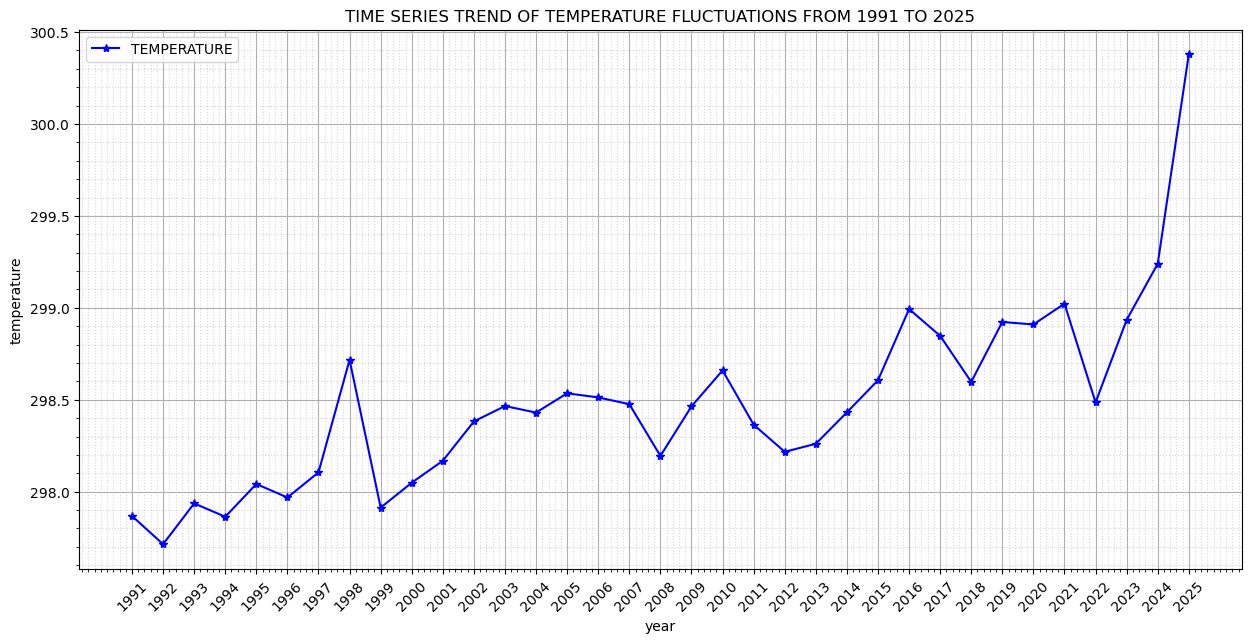

In [6]:
plt.figure(figsize=(15,7))
yearly_mean['t2m'].plot(color='blue',marker='*',label='TEMPERATURE')
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('TIME SERIES TREND OF TEMPERATURE FLUCTUATIONS FROM 1991 TO 2025')
plt.grid(True)
plt.xticks(yearly_mean['year'],rotation=45)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()
plt.show()

# IMPORTING MANN KENDALL LIBRARY

In [19]:
import pymannkendall as mk

# ASSIGNING TEMPERATURE VALUES TO 'temperature' VARIABLE

In [20]:
temperature = yearly_mean['t2m'].values
print(temperature)

[297.86798 297.71442 297.9365  297.8637  298.0419  297.96863 298.1049
 298.71725 297.9134  298.049   298.16827 298.38226 298.46582 298.43042
 298.53525 298.51276 298.47617 298.1947  298.46393 298.65976 298.3646
 298.217   298.2607  298.4316  298.6061  298.99332 298.84778 298.59726
 298.92316 298.90952 299.02258 298.48532 298.93436 299.23972 300.37933]


# MANN KENDALL VALUES

In [21]:
MK_TEST = mk.original_test(temperature)
print(f"trend: {MK_TEST.trend}")
print(f"h value: {MK_TEST.h}")
print(f"p-value: {MK_TEST.p}")
print(f"z-statistic: {MK_TEST.z}")
print(f"Kendall's Tau: {MK_TEST.Tau}")
print(f"Kendall's s: {MK_TEST.s}")
print(f"var_s: {MK_TEST.var_s}")
print(f"slope: {MK_TEST.slope}")
print(f"intercept: {MK_TEST.intercept}")

trend: increasing
h value: True
p-value: 9.61531831933371e-09
z-statistic: 5.737378548173549
Kendall's Tau: 0.680672268907563
Kendall's s: 405.0
var_s: 4958.333333333333
slope: 0.037127685546875
intercept: 297.8327575683594


# EXTRACTING SLOPE AND INTERCEPT VALUES

In [22]:
extract_slope = MK_TEST.slope
extract_intercept = MK_TEST.intercept
print(f"sen's slope: {extract_slope}")
print(f"intercept: {extract_intercept}")

sen's slope: 0.037127685546875
intercept: 297.8327575683594


# ASSIGNING YEARS TO 'years' VARIABLE

In [23]:
years = yearly_mean['year'].values
print(years)

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2024 2025]


# COMPUTING TRENDLINE USING STRAIGHT LINE EQUATION (y=mx+c)

In [24]:
trendline = extract_slope * years + extract_intercept
print(trendline)

[371.75397949 371.79110718 371.82823486 371.86536255 371.90249023
 371.93961792 371.97674561 372.01387329 372.05100098 372.08812866
 372.12525635 372.16238403 372.19951172 372.2366394  372.27376709
 372.31089478 372.34802246 372.38515015 372.42227783 372.45940552
 372.4965332  372.53366089 372.57078857 372.60791626 372.64504395
 372.68217163 372.71929932 372.756427   372.79355469 372.83068237
 372.86781006 372.90493774 372.94206543 372.97919312 373.0163208 ]


# OVERLAYING SEN'S SLOPE OVER TIME SERIES PLOT

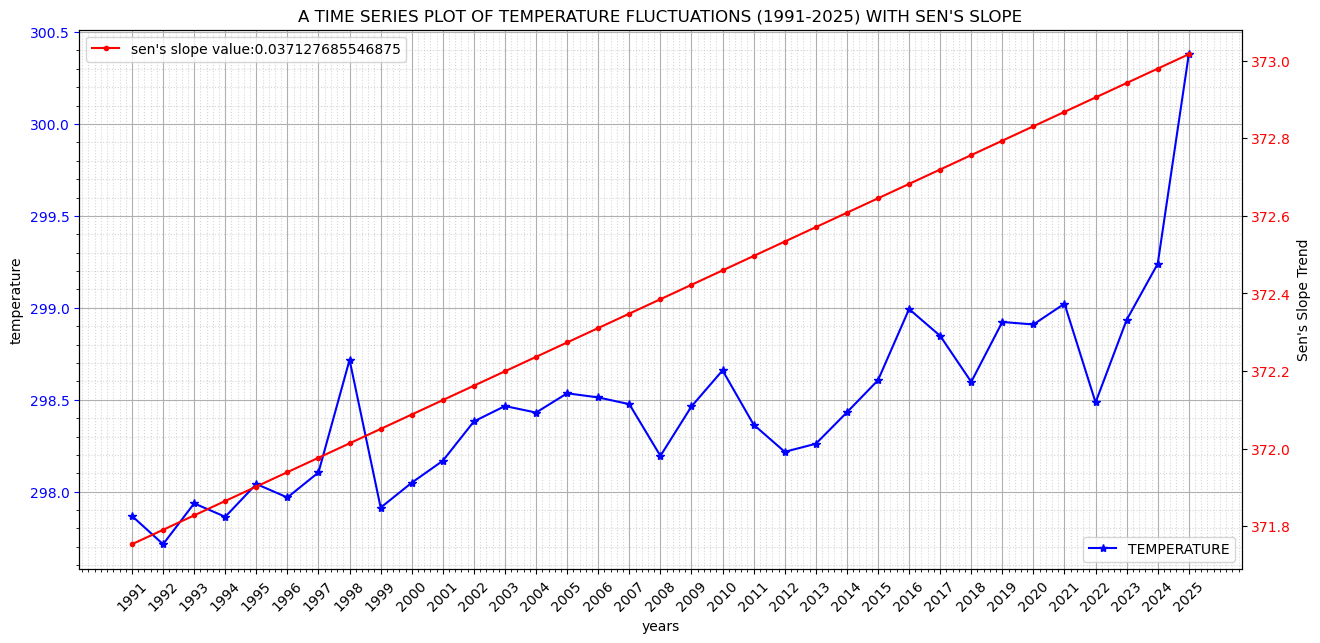

In [37]:
fig,ax1 = plt.subplots(figsize=(15,7))
yearly_mean['t2m'].plot(color='blue',marker='*',label='TEMPERATURE')
ax1.set_xlabel('years')
ax1.set_ylabel('temperature')
ax1.tick_params(axis='y',color='blue',labelcolor='blue')
ax1.tick_params(axis='x',labelcolor='black')
ax1.grid(True)
ax1.grid(which='minor',linestyle=':',alpha=0.5)
ax1.minorticks_on()
ax1.legend(loc='lower right')
ax1.set_title('A TIME SERIES PLOT OF TEMPERATURE FLUCTUATIONS (1991-2025) WITH SEN\'S SLOPE')

plt.xticks(years[::1],rotation=45)


ax2 = ax1.twinx()
ax2.set_ylabel('Sen\'s Slope Trend')
ax2.plot(years,trendline, color='red', marker='.', linestyle='-', label= f"sen's slope value:{MK_TEST.slope}")
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc='best')

plt.show()